In [98]:
import nltk
import csv
import re
import sys
from nltk.tokenize import word_tokenize, sent_tokenize
import pandas as pd
from nltk.corpus import stopwords 
import seaborn as sns
%matplotlib inline

In [22]:
data_path = "SubtaskA_EvaluationData.csv"
out_path = "bhuvnesh_gupta.csv"

In [23]:
def classify(sent_list):

    keywords = ["suggest","recommend","hopefully","go for","request","it would be nice","adding","should come with","should be able","could come with", "i need" , "we need","needs", "would like to","would love to","allow","add"]

    # Goldberg et al.
    pattern_strings = [r'.*would\slike.*if.*', r'.*i\swish.*', r'.*i\shope.*', r'.*i\swant.*', r'.*hopefully.*',
                       r".*if\sonly.*", r".*would\sbe\sbetter\sif.*", r".*should.*", r".*would\sthat.*",
                       r".*can't\sbelieve.*didn't.*", r".*don't\sbelieve.*didn't.*", r".*do\swant.*", r".*i\scan\shas.*"]
    compiled_patterns = []
    for patt in pattern_strings:
        compiled_patterns.append(re.compile(patt))


    label_list = []
    for sent in sent_list:
        tokenized_sent = word_tokenize(sent[1])
        tagged_sent = nltk.pos_tag(tokenized_sent)
        tags = [i[1] for i in tagged_sent]
        label = 0
        patt_matched = False
        for compiled_patt in compiled_patterns:
            joined_sent = " ".join(tokenized_sent)
            matches = compiled_patt.findall(joined_sent)
            if len(matches) > 0:
                patt_matched = True
        keyword_match = any(elem in keywords for elem in tokenized_sent)
        
        
        pos_match = any(elem in ['MD', 'VB'] for elem in tags)

    

        if patt_matched:
            label = 1
        elif keyword_match == True:
                label = 1
        elif pos_match == True:
                label = 1    
     

        label_list.append(label)



    return label_list

#This reads CSV a given CSV and stores the data in a list
def read_csv(data_path):
    file_reader = csv.reader(open(data_path,"rt", errors="ignore",encoding="utf-8"), delimiter=',')
    sent_list = []

    for row in file_reader:
        id = row[0]
        sent = row[1]
        sent_list.append((id,sent))
    return sent_list

#This will create and write into a new CSV
def write_csv(sent_list, label_list, out_path):
        filewriter = csv.writer(open(out_path, "w",encoding="utf-8"))
        filewriter.writerow(["id","Sentence","Prediction"])
        count = 0
        data = [[id, sent, label] for ((id, sent), label) in zip(sent_list, label_list)]
        filewriter.writerows(data)



In [113]:
sent_list = read_csv(data_path)
label_list = classify(sent_list)
write_csv(sent_list, label_list, out_path)
df = pd.read_csv(out_path)
df.head()

,id,Sentence,Prediction
0,9566,This would enable live traffic aware apps.,1
1,9569,Please try other formatting like bold italics ...,1
2,9576,Since computers were invented to save time I s...,1
3,9577,Allow rearranging if the user wants to change ...,1
4,9579,Add SIMD instructions for better use of ARM NE...,0


Taking The Fields Which Are A Suggestion For Further Analysis 

In [151]:
df=df[df["Prediction"]==1]
df.Sentence
def analysis(str):
    print(str)

KeyError: 0

Used Sentiment Intensity Analyser To Find Out Whether The Sentence Is Positive Or Negative

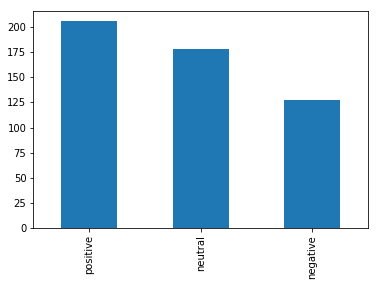

In [195]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid=SentimentIntensityAnalyzer()
s=[]
for sentence in df.Sentence:
    sentence.index
    s.append(sid.polarity_scores(str(sentence)))
s
df["polarity"]="neutral"
i=0
y=[]
for x in df["polarity"]:
    if s[i]["compound"] == 0:
        y.append("neutral")
    elif s[i]["compound"] > 0:
        y.append('positive')
    else:
        y.append('negative')
    i=i+1
df["polarity"]=y
x1= df["polarity"].value_counts()
x1.plot(kind="bar")

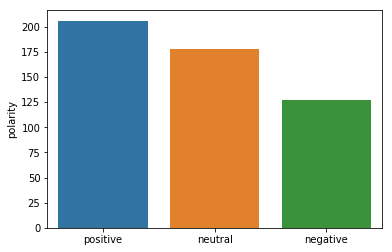

In [192]:
sns.barplot(x=["positive","neutral","negative"],y=x1)

Tokenizing the sentences and then removing the stop words from them. To find out the most occuring words in the suggestion 

In [110]:
tokenized_sent= []
filtered_sentence =[]
stop_words = set(stopwords.words('english')) 
for sent in df.Sentence:
    tokenized_sent+=nltk.word_tokenize(sent)
for word in tokenized_sent: 
    if word not in stop_words:
        if word.isalnum():
            filtered_sentence.append(word)
#tokenized_sent

In [193]:
df_tokenized = pd.DataFrame(filtered_sentence)
#df_tokenized
df_tokenized.rename(columns={'0':'words',}, 
                 inplace=True)
df3 = df_tokenized[0].value_counts().head()
df3

I        157
app       88
would     55
like      50
apps      49
Name: 0, dtype: int64

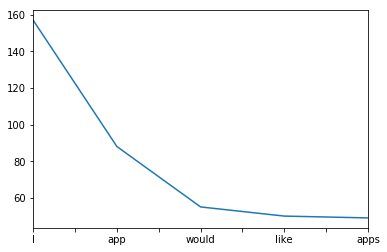

In [194]:
df3.plot(kind="line")